# Seaborn: JointGrid

In [1]:
import seaborn as sns

from matplotlib import pyplot as plt

In [15]:
cars = sns.load_dataset('mpg')

In [16]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Basics

In [17]:
sns.set_style('darkgrid')

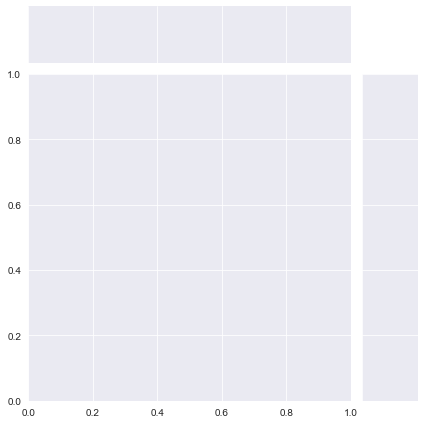

In [18]:
g = sns.JointGrid();

In [19]:
type(g)

seaborn.axisgrid.JointGrid

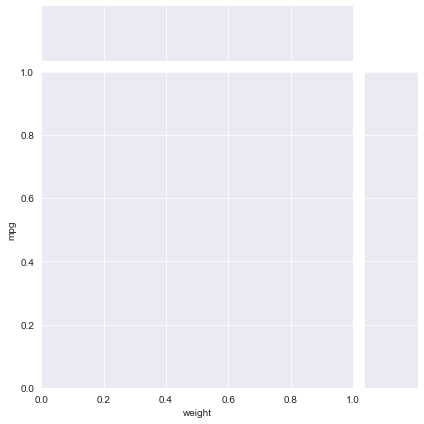

In [20]:
g = sns.JointGrid(data=cars, x='weight', y='mpg');

### `.plot()`

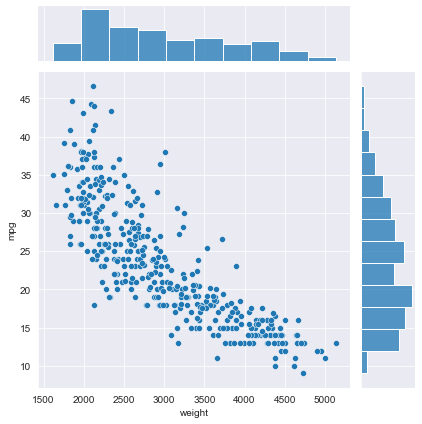

In [22]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot);

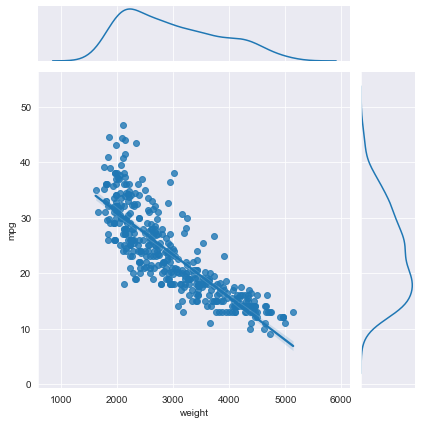

In [25]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.regplot, sns.kdeplot);

## Joint and Marginal Plots

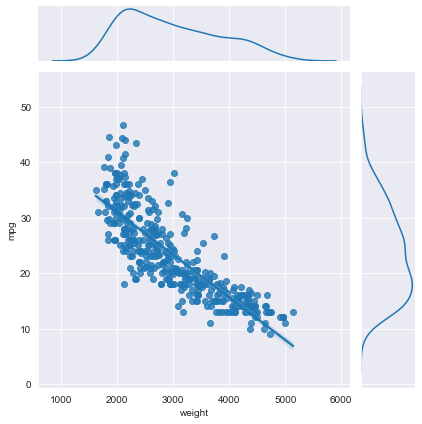

In [30]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.regplot, sns.kdeplot);

### `.plot_joint(), .plot_marginals()`

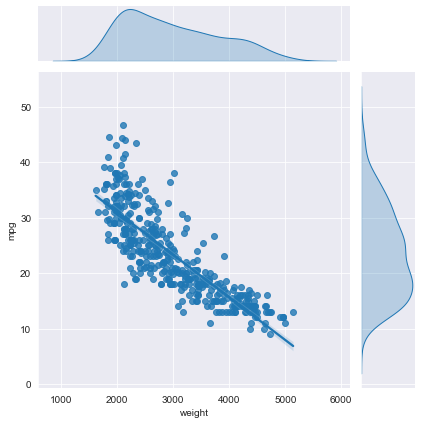

In [31]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot)
#g.plot_marginals(sns.kdeplot, fill=True);  #add this after executing above; add fill=True after executing plot_marg line

### JointGrid Axes

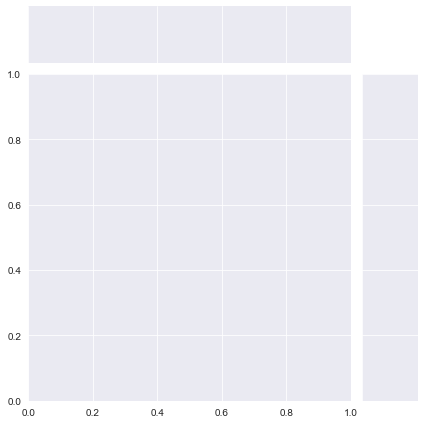

In [34]:
g = sns.JointGrid()

In [ ]:
#g. TAB  first then grab/type below

In [36]:
type(g.ax_marg_x)  

matplotlib.axes._subplots.AxesSubplot

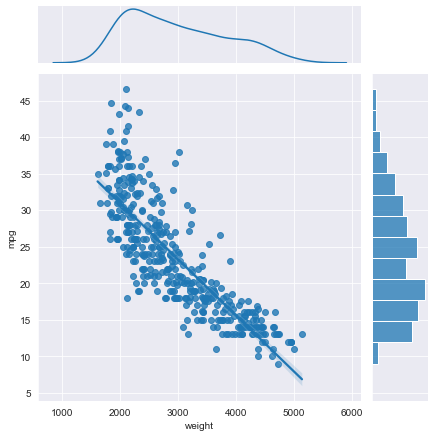

In [42]:
g = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint)
sns.kdeplot(x=x, ax=g.ax_marg_x)
sns.histplot(y=y, ax=g.ax_marg_y);

## Hue

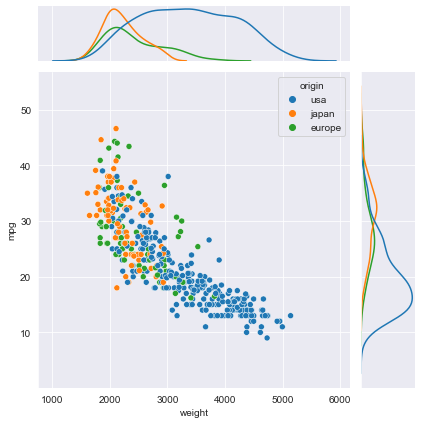

In [46]:
g = sns.JointGrid(data=cars, x='weight', y='mpg', hue='origin')
g.plot(sns.scatterplot, sns.kdeplot);

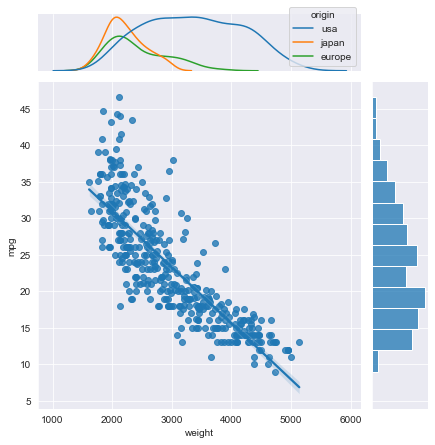

In [51]:
g = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint)
sns.kdeplot(x=x, ax=g.ax_marg_x, hue=cars.origin)  #add this
sns.histplot(y=y, ax=g.ax_marg_y);

## Styling

### General Styling

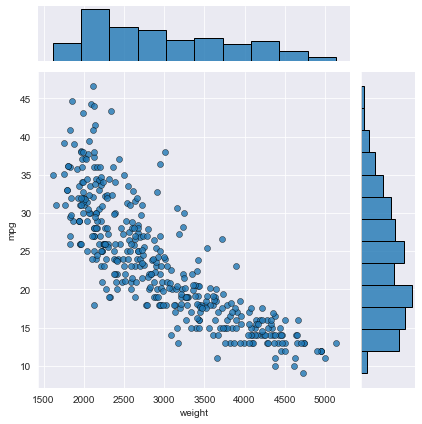

In [54]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot, alpha=0.8, edgecolor='black');

### Plot-specific Keywords

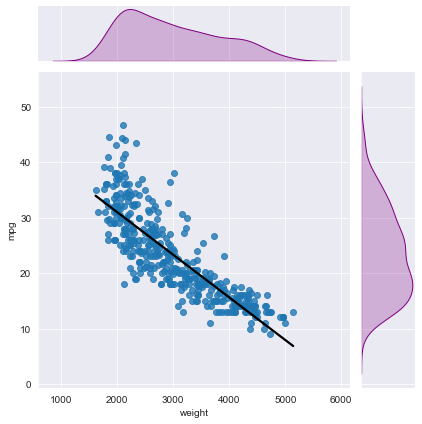

In [65]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot, line_kws={'color':'black'}, ci=None)
g.plot_marginals(sns.kdeplot, fill=True, color='purple');

### Joint Grid Properties

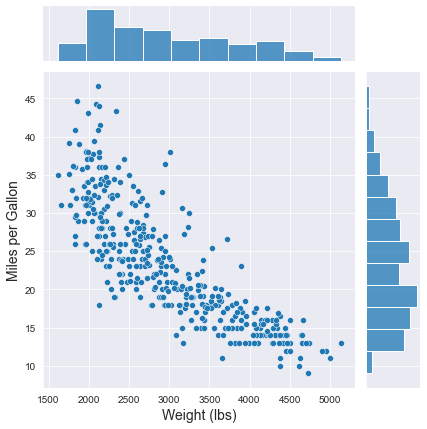

In [70]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot)
g.set_axis_labels(xlabel='Weight (lbs)', ylabel="Miles per Gallon", fontsize=14)
g.savefig('Joint_Grid_Example.png');

In [71]:
!open 'Joint_Grid_Example.png'

## Thumbnail and Overlays

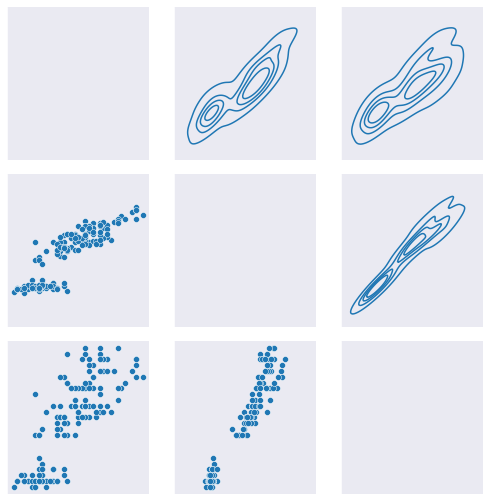

In [21]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, n_levels=5)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
#g.savefig('23pairgrid_image_blank.png', dpi=200)
#g.savefig('23pairgrid_image_maindiag.png', dpi=200)
#g.savefig('23pairgrid_image_offdiag.png', dpi=200)
#g.savefig('23pairgrid_image_differentdiag.png', dpi=200)

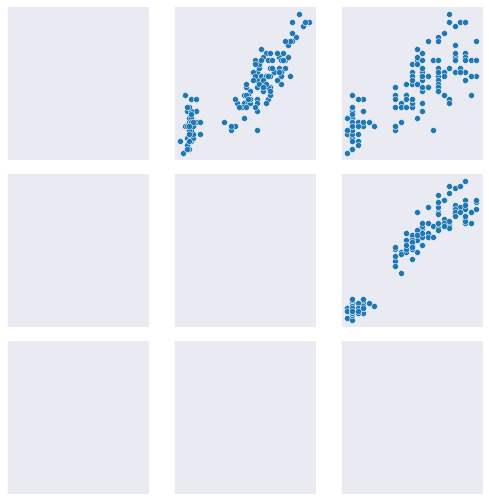

In [22]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
#g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
#g.savefig('23pairgrid_image_lowertri.png', dpi=200)
#g.savefig('23pairgrid_image_uppertri.png', dpi=200)

### Thumbnail

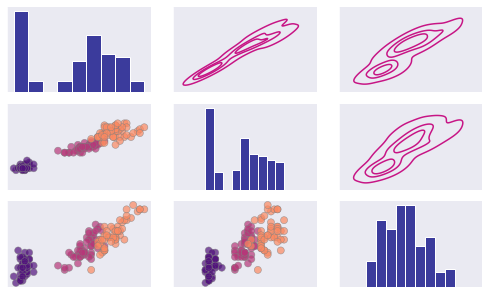

In [23]:
g = sns.PairGrid(iris, 
                 hue='species', 
                 palette='magma', 
                 vars=['petal_length', 'petal_width', 'sepal_length'], 
                 height=1.5, 
                 aspect=1.65, 
                 diag_sharey=False
                )
g.map_lower(sns.scatterplot, s=50, alpha=0.7, ec='gray')
g.map_diag(sns.histplot,hue=None, color='navy')
g.map_upper(sns.kdeplot, n_levels=4,hue=None, color='mediumvioletred')
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
#g.savefig('23pairgrid_image_thumb.png', dpi=200);